# 3D Data Visualization

In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Case 1: Performance of the Route Flow Estimation Model

# Source data

# 本文提出方法数据
rpr_center_list = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]  
sigma_list = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00] 
num_sensor = 60 

pkl_file = open('exp_2_sensor_60_rmse_dict.pkl', 'rb') 
rmse_dict = pickle.load(pkl_file) 

# 

c_rmse = np.zeros([10, 10])
c_mape = np.zeros([10, 10])
for i in range(10):
    for j in range(10):
        c_rmse[i, j] = rmse_dict[num_sensor, rpr_center_list[i], sigma_list[j]]
        # c_mape[i, j] = mape_dict[num_sensor, rpr_center_list[i], sigma_list[j]]
        
c_rmse[3, 2] = 0.5 * (c_rmse[2, 2] + c_rmse[4, 2]) 
c_rmse[4, 6] = 0.5 * (c_rmse[3, 6] + c_rmse[5, 6]) 


# performance of improbved pfe（对比方法数据）
imp_pfe_rmse_list = [42.45, 48.31, 25.82, 4.27, 3.77, 0.08]
imp_pfe_mape_list = [1.4329, 1.1191, 0.5058, 0.2531, 0.1016, 0.0035] 

imp_pfe_rmse = imp_pfe_rmse_list[2]

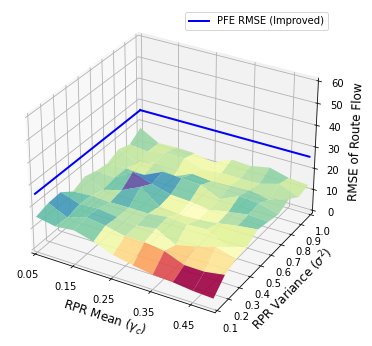

In [13]:
# Visualization
benchmark_2 = imp_pfe_rmse

fig = plt.figure(figsize=(6, 6))
a, b = np.mgrid[0.05 : 0.50 : 10j, 0.1 : 1.0 : 10j]
a_benchmark_x, b_benchmark_x = np.mgrid[0.05 : 0.50 : 10j, 1.0 : 1.0 : 1j]
c_benchmark_x2 = np.zeros([10, 1])
c_benchmark_x2 += benchmark_2

a_benchmark_x, b_benchmark_x, c_benchmark_x2 = \
np.squeeze(a_benchmark_x), np.squeeze(b_benchmark_x), np.squeeze(c_benchmark_x2)

a_benchmark_y, b_benchmark_y = np.mgrid[0.05 : 0.05 : 1j, 0.1 : 1.0 : 10j]
c_benchmark_y2 = np.zeros([1, 10])
# c_benchmark_y1 += benchmark_1
c_benchmark_y2 += benchmark_2
a_benchmark_y, b_benchmark_y, c_benchmark_y2 = \
np.squeeze(a_benchmark_y), np.squeeze(b_benchmark_y), np.squeeze(c_benchmark_y2)


ax = plt.subplot(111, projection='3d') 
ax.plot(a_benchmark_x, b_benchmark_x, c_benchmark_x2, color='blue', lw=2, label='PFE RMSE (Improved)') 
ax.plot(a_benchmark_y, b_benchmark_y, c_benchmark_y2, color='blue', lw=2) 
surf = ax.plot_surface(a, b, c_rmse, rstride=1, cstride=1, cmap=plt.cm.Spectral, alpha=0.9) # cmap=plt.cm.Spectral), color='red'

ax.legend() 
ax.set_xlabel('RPR Mean ($\gamma_c$)', fontsize=12) 
ax.set_ylabel('RPR Variance ($\sigma^2$)', fontsize=12) 
ax.set_zlabel('RMSE of Route Flow', fontsize=12) 
ax.set_xlim(0.05, 0.5) 
ax.set_ylim(0.1, 1.0) 
ax.set_zlim(0, 60) 
ax.set_xticks(np.arange(0.05, 0.55, 0.1)) 
ax.set_yticks(np.arange(0.1, 1.1, 0.1)); 

# 存储图片
# plt.savefig('image/exp_2_sensor_{}_rmse.png'.format(num_sensor), dpi=300, bbox_inches = 'tight') 